# Example of NBR and dNBR

Use the Thomas fire data for this.

In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from functions import load_scene, composite

Load the pre-cropped scene.

In [2]:
before = load_scene(
    Path("../data/thomas_fire/LC08_L2SP_042036_20171123_20200902_02_T1_cropped/"),
    pattern="[2-7]",
)
after = load_scene(
    Path("../data/thomas_fire/LC08_L2SP_042036_20180126_20200902_02_T1_cropped/"),
    pattern="[2-7]",
)

Calculate NBR and dNBR

In [3]:
nbr_before = (before[5] - before[7]) / ((before[5] + before[7]))
nbr_after = (after[5] - after[7]) / ((after[5] + after[7]))
dnbr = nbr_before - nbr_after

Plot RBG composite besides the NDVI

In [4]:
rgb_before = composite(before, bands=[4, 3, 2], in_range=(6000, 15000))
rgb_after = composite(after, bands=[4, 3, 2], in_range=(6000, 15000))

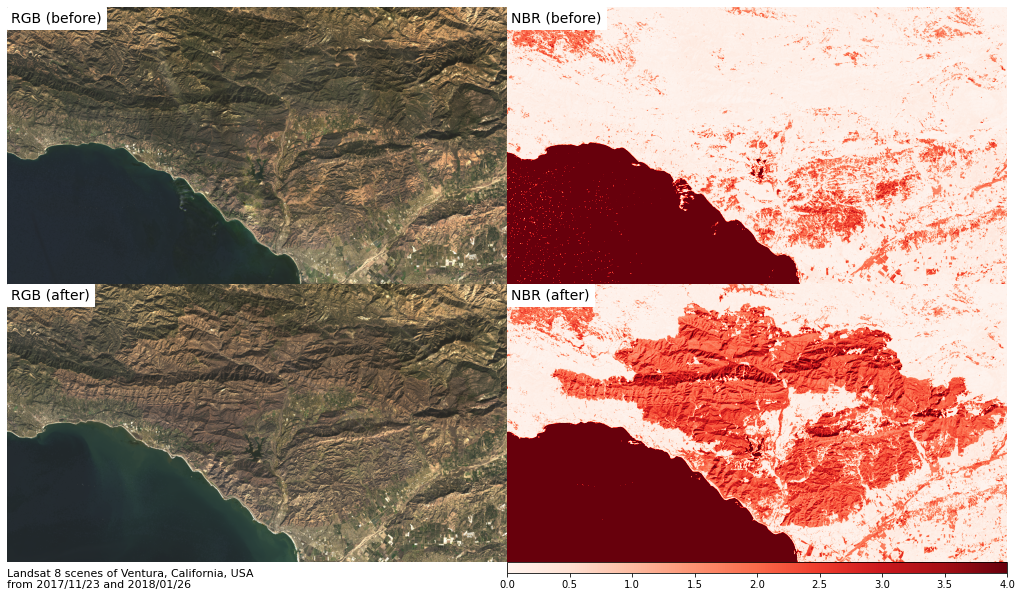

In [5]:
fig = plt.figure(figsize=(14, 8.1))

grid = GridSpec(51, 2, figure=fig, wspace=0, hspace=0)
axes =[
    fig.add_subplot(grid[0:25, 0]),
    fig.add_subplot(grid[25:50, 0]),
    fig.add_subplot(grid[0:25, 1]),
    fig.add_subplot(grid[25:50, 1]),
    
]
cbax = fig.add_subplot(grid[50, 1])
ax1, ax2, ax3, ax4 = axes

x, y = 20, 20

ax1.imshow(rgb_before)
ax1.text(
    x, y,
    f"RGB (before)", 
    color="black", 
    fontweight="normal", 
    fontsize=14,
    verticalalignment="top",
    backgroundcolor="white",
)    
ax2.imshow(rgb_after)
ax2.text(
    x, y,
    f"RGB (after)", 
    color="black", 
    fontweight="normal", 
    fontsize=14,
    verticalalignment="top",
    backgroundcolor="white",
)    

vmin, vmax = 0, 4
tmp = ax3.imshow(nbr_before, cmap="Reds", vmin=vmin, vmax=vmax)
ax3.text(
    x, y,
    f"NBR (before)", 
    color="black", 
    fontweight="normal", 
    fontsize=14,
    verticalalignment="top",
    backgroundcolor="white",
)    
tmp = ax4.imshow(nbr_after, cmap="Reds", vmin=vmin, vmax=vmax)
ax4.text(
    x, y,
    f"NBR (after)", 
    color="black", 
    fontweight="normal", 
    fontsize=14,
    verticalalignment="top",
    backgroundcolor="white",
)    

fig.colorbar(tmp, cax=cbax, orientation="horizontal")

for ax in axes:
    ax.axis("off")

fig.text(0, 0, 
    "Landsat 8 scenes of Ventura, California, USA\nfrom 2017/11/23 and 2018/01/26", 
    color="black", 
    fontweight="normal", 
    fontsize=11,
    verticalalignment="bottom",
    backgroundcolor="white",
)
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.savefig("../lectures/images/nbr_thomas_fire.svg", bbox_inches="tight", pad_inches=0)